|Field|Description|
|---:|:---|
|Country|Country|
|Year|Year|
|Status|Developed or Developing status|
|Life expectancy|Life Expectancy in age|
|Adult Mortality|Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)|
|infant deaths|Number of Infant Deaths per 1000 population|
|Alcohol|Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)|
|percentage expenditure|Expenditure on health as a percene of Gross Domestic Product per capita(%)|
|Hepatitis B|Hepatitis B (HepB) immunization coverage among 1-year-olds (%)|
|Measles|Measles - number of reported cases per 1000 population|
|BMI|Average Body Mass Index of entire population|
|under-five deaths|Number of under-five deaths per 1000 population|
|Polio|Polio (Pol3) immunization coverage among 1-year-olds (%)|
|Total expenditure|General government expenditure on health as a percene of total government expenditure (%)|
|Diphtheria|Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)|
|HIV/AIDS|Deaths per 1 000 live births HIV/AIDS (0-4 years)|
|GDP|Gross Domestic Product per capita (in USD)|
|Population|Population of the country|
|thinness 1-19 years|Prevalence of thinness among children and adolescents for Age 10 to 19 (%)|
|thinness 5-9 years|Prevalence of thinness among children for Age 5 to 9(%)|
|Income composition of resources|Income composition of resources|
|Schooling|Number of years of Schooling(years)|


In [378]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import statsmodels.tools

In [379]:
LED = pd.read_csv('Life Expectancy Data.csv')
Life = pd.DataFrame(LED)
Life.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [380]:
Life.dtypes

Country                         object
Region                          object
Year                             int64
Infant_deaths                  float64
Under_five_deaths              float64
Adult_mortality                float64
Alcohol_consumption            float64
Hepatitis_B                      int64
Measles                          int64
BMI                            float64
Polio                            int64
Diphtheria                       int64
Incidents_HIV                  float64
GDP_per_capita                   int64
Population_mln                 float64
Thinness_ten_nineteen_years    float64
Thinness_five_nine_years       float64
Schooling                      float64
Economy_status_Developed         int64
Economy_status_Developing        int64
Life_expectancy                float64
dtype: object

In [381]:
Life.isnull().sum()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64

In [382]:
Life.shape

(2864, 21)

In [383]:
Life.Region.unique()

array(['Middle East', 'European Union', 'Asia', 'South America',
       'Central America and Caribbean', 'Rest of Europe', 'Africa',
       'Oceania', 'North America'], dtype=object)

In [384]:
Life.Country.unique().sort()

In [385]:
Life[['Economy_status_Developing']].sum()

Economy_status_Developing    2272
dtype: int64

In [386]:
Life[['Economy_status_Developed']].sum()

Economy_status_Developed    592
dtype: int64

In [387]:
LpY=Life.groupby(['Year'])[['Life_expectancy']].max()
LpY

,Life_expectancy
Year,
2000,81.1
2001,81.4
2002,81.6
2003,81.8
2004,82.0
2005,81.9
2006,82.3
2007,82.5
2008,82.6


In [388]:
LpR=Life.groupby(['Region'])[['Life_expectancy']].mean()
LpR

,Life_expectancy
Region,
Africa,57.847304
Asia,69.454861
Central America and Caribbean,72.437500
European Union,77.715046
Middle East,73.975446
North America,77.841667
Oceania,69.517614
Rest of Europe,74.525417
South America,72.780729


In [389]:
LpC=Life.groupby(['Country'])[['Life_expectancy']].max()
LpC

,Life_expectancy
Country,
Afghanistan,63.4
Albania,78.0
Algeria,76.1
Angola,59.4
Antigua and Barbuda,76.5
...,...
"Venezuela, RB",73.1
Vietnam,75.1
"Yemen, Rep.",66.1


In [390]:
LpR=Life.groupby(['Region'])[['Life_expectancy']].max()
LpR

,Life_expectancy
Region,
Africa,76.1
Asia,83.8
Central America and Caribbean,79.6
European Union,83.2
Middle East,82.2
North America,81.9
Oceania,82.4
Rest of Europe,83.2
South America,79.6


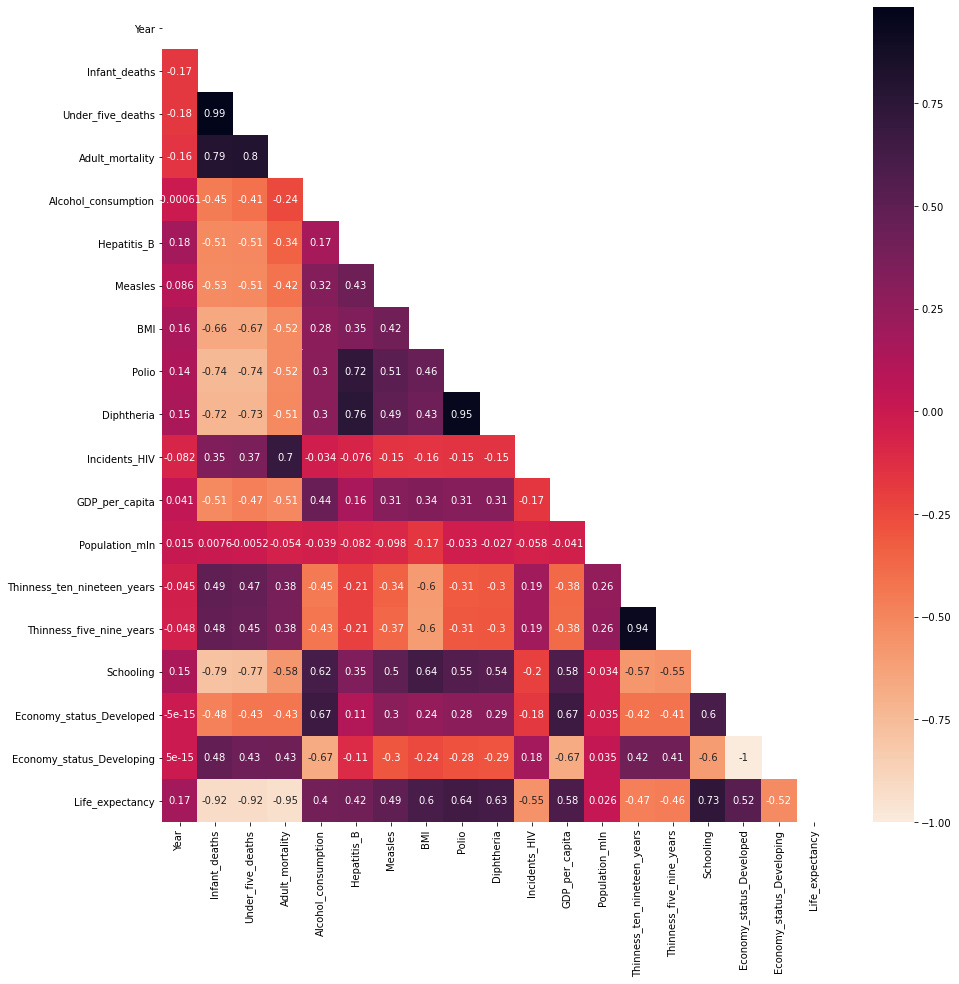

In [391]:
plt.figure(figsize=(15,15))
sns.heatmap(Life.corr(),annot=True,mask=np.triu(Life.corr()),cmap='rocket_r')
plt.show()

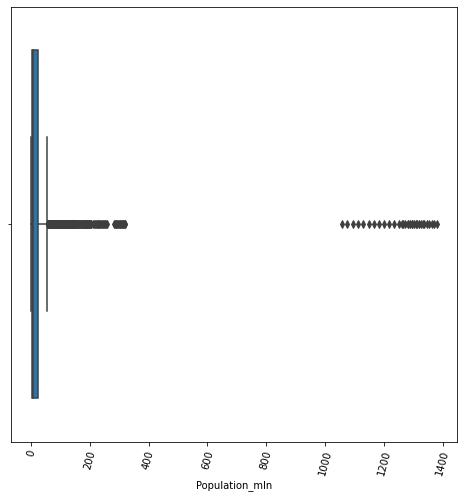

In [392]:
plt.figure(figsize=(8,8))
sns.boxplot(data=Life,x='Population_mln')
plt.xticks(rotation=75)
plt.show()

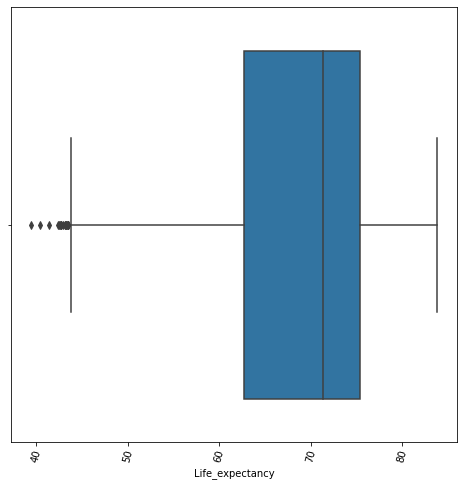

In [393]:
plt.figure(figsize=(8,8))
sns.boxplot(data=Life,x='Life_expectancy')
plt.xticks(rotation=75)
plt.show()

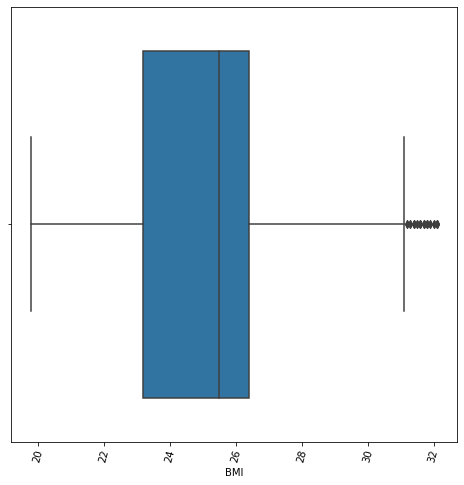

In [394]:
plt.figure(figsize=(8,8))
sns.boxplot(data=Life,x='BMI')
plt.xticks(rotation=75)
plt.show()

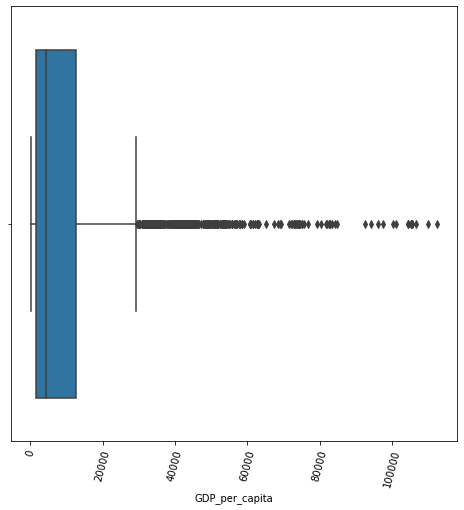

In [395]:
plt.figure(figsize=(8,8))
sns.boxplot(data=Life,x='GDP_per_capita')
plt.xticks(rotation=75)
plt.show()

<Figure size 720x720 with 0 Axes>

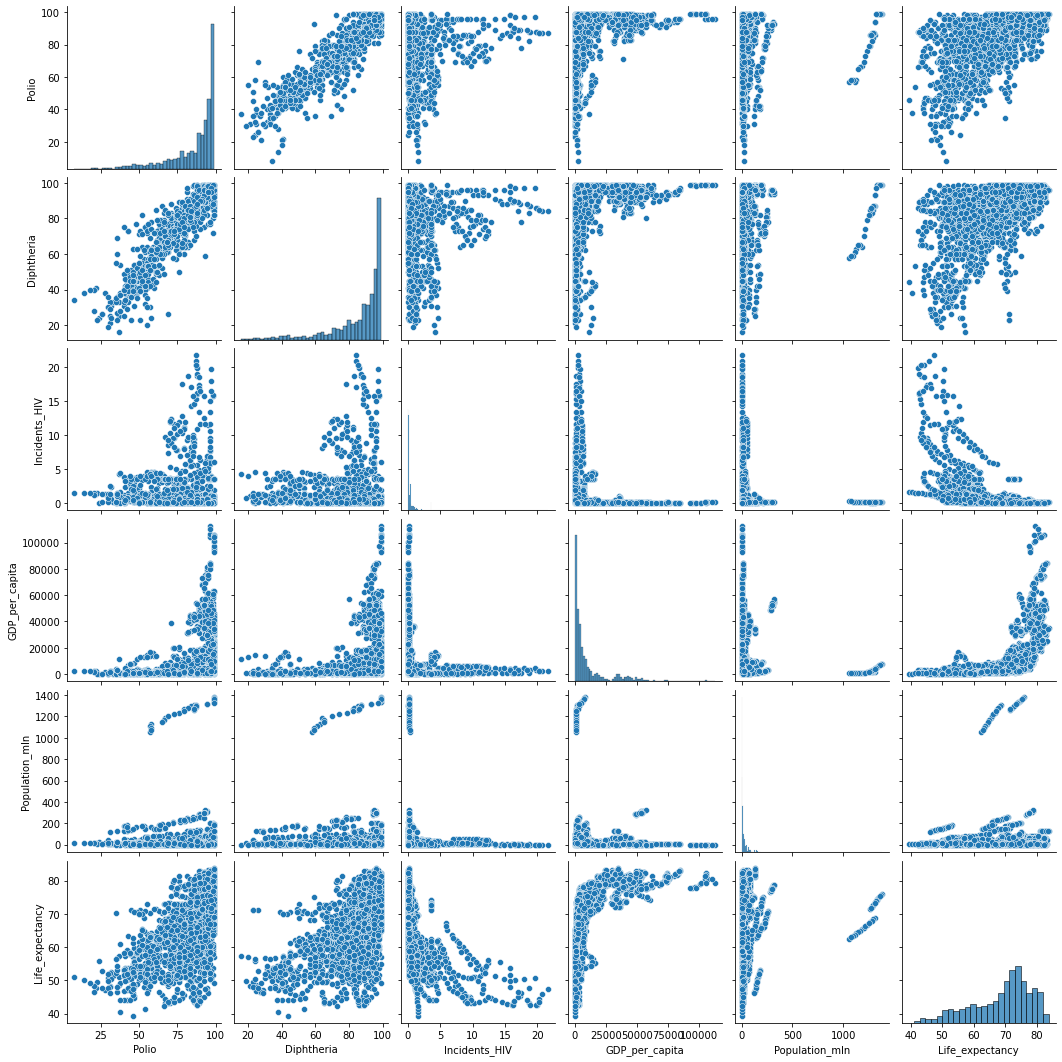

In [396]:
plt.figure(figsize=(10,10))
sns.pairplot(data=Life,vars=['Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln','Life_expectancy'])
plt.show()

In [397]:
GDP=Life[['GDP_per_capita','Life_expectancy']].copy()

In [398]:
GDP['GDP_inv']=1/(GDP['GDP_per_capita'])

In [399]:
GDP

,GDP_per_capita,Life_expectancy,GDP_inv
0,11006,76.5,0.000091
1,25742,82.8,0.000039
2,1076,65.4,0.000929
3,4146,67.0,0.000241
4,33995,81.7,0.000029
...,...,...,...
2859,399,49.9,0.002506
2860,2515,66.9,0.000398
2861,2130,74.3,0.000469
2862,7424,71.8,0.000135


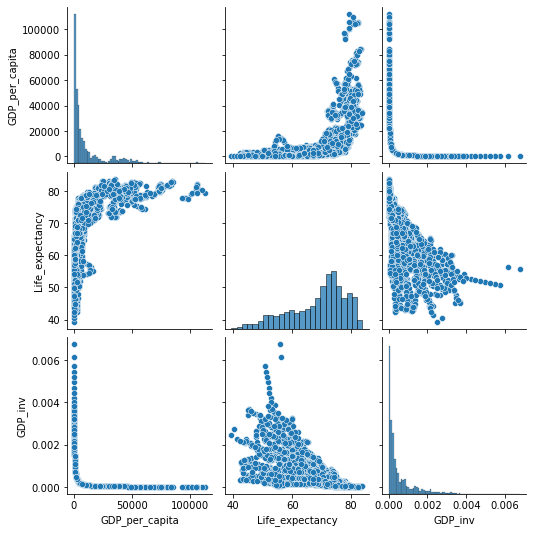

In [400]:
sns.pairplot(GDP)

In [401]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [402]:
Life.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000


In [403]:
Life.columns

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy'],
      dtype='object')

In [404]:
sensitive=['Hepatitis_B','Measles','BMI',
           'Polio','Diphtheria','Incidents_HIV','Thinness_ten_nineteen_years','Thinness_five_nine_years']

non_sensitive=['Year', 'Infant_deaths', 'Under_five_deaths', 'Adult_mortality',
       'Alcohol_consumption','GDP_per_capita','Population_mln','Schooling',
       'Economy_status_Developed','Region_Asia',
       'Region_Central America and Caribbean', 'Region_European Union',
       'Region_Middle East', 'Region_North America', 'Region_Oceania',
       'Region_Rest of Europe', 'Region_South America']

In [405]:
prompt=input("Do you consent to using advanced population data, which may include protected information, for better accuracy (Y/N)?")
if prompt=='Y':
    print('Thank you, you have chosen the more accurate model')
else:
    print('Thank you, you have chosen the protected model')

Do you consent to using advanced population data, which may include protected information, for better accuracy (Y/N)? Y


Thank you, you have chosen the more accurate model


In [406]:
life_ohe=pd.get_dummies(Life,columns=['Region'],drop_first=True,prefix='Region')
life_ohe

,Country,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,...,Economy_status_Developing,Life_expectancy,Region_Asia,Region_Central America and Caribbean,Region_European Union,Region_Middle East,Region_North America,Region_Oceania,Region_Rest of Europe,Region_South America
0,Turkiye,2015,11.1,13.0,105.8240,1.320,97,65,27.8,97,...,1,76.5,0,0,0,1,0,0,0,0
1,Spain,2015,2.7,3.3,57.9025,10.350,97,94,26.0,97,...,0,82.8,0,0,1,0,0,0,0,0
2,India,2007,51.5,67.9,201.0765,1.570,60,35,21.2,67,...,1,65.4,1,0,0,0,0,0,0,0
3,Guyana,2006,32.8,40.5,222.1965,5.680,93,74,25.3,92,...,1,67.0,0,0,0,0,0,0,0,1
4,Israel,2012,3.4,4.3,57.9510,2.890,97,89,27.0,94,...,0,81.7,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,Niger,2000,97.0,224.9,291.8240,0.092,72,64,20.8,41,...,1,49.9,0,0,0,0,0,0,0,0
2860,Mongolia,2009,23.9,28.6,235.2330,6.560,97,97,25.3,96,...,1,66.9,1,0,0,0,0,0,0,0
2861,Sri Lanka,2004,17.7,28.9,134.8950,1.560,62,95,21.9,97,...,1,74.3,1,0,0,0,0,0,0,0
2862,Lithuania,2002,7.9,9.9,204.0120,11.000,94,95,26.1,97,...,0,71.8,0,0,1,0,0,0,0,0


In [407]:
life_ohe.drop(columns=['Country','Economy_status_Developing'],inplace=True)

In [408]:
life_ohe.columns

Index(['Year', 'Infant_deaths', 'Under_five_deaths', 'Adult_mortality',
       'Alcohol_consumption', 'Hepatitis_B', 'Measles', 'BMI', 'Polio',
       'Diphtheria', 'Incidents_HIV', 'GDP_per_capita', 'Population_mln',
       'Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'Schooling',
       'Economy_status_Developed', 'Life_expectancy', 'Region_Asia',
       'Region_Central America and Caribbean', 'Region_European Union',
       'Region_Middle East', 'Region_North America', 'Region_Oceania',
       'Region_Rest of Europe', 'Region_South America'],
      dtype='object')

In [409]:
# robust scaling year, population, gdp 
life_ohe_scale=life_ohe[['Year','GDP_per_capita','Population_mln']].copy()
rob=RobustScaler()
rob.fit(life_ohe_scale)
life_ohe_robust=rob.transform(life_ohe_scale)

In [410]:
life_robust=pd.DataFrame(life_ohe_robust,columns=['Year_rob','GDP_rob','Population_rob'])
life_robust.head()

,Year_rob,GDP_rob,Population_rob
0,1.000000,0.609357,3.273738
1,1.000000,1.932009,1.787402
2,-0.066667,-0.281925,54.440019
3,-0.200000,-0.006373,-0.328856
4,0.600000,2.672770,0.002779


In [411]:
life_ohe[['Year_rob','GDP_rob','Population_rob']]=life_robust
life_ohe.head()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,...,Region_Central America and Caribbean,Region_European Union,Region_Middle East,Region_North America,Region_Oceania,Region_Rest of Europe,Region_South America,Year_rob,GDP_rob,Population_rob
0,2015,11.1,13.0,105.8240,1.32,97,65,27.8,97,97,...,0,0,1,0,0,0,0,1.000000,0.609357,3.273738
1,2015,2.7,3.3,57.9025,10.35,97,94,26.0,97,97,...,0,1,0,0,0,0,0,1.000000,1.932009,1.787402
2,2007,51.5,67.9,201.0765,1.57,60,35,21.2,67,64,...,0,0,0,0,0,0,0,-0.066667,-0.281925,54.440019
3,2006,32.8,40.5,222.1965,5.68,93,74,25.3,92,93,...,0,0,0,0,0,0,1,-0.200000,-0.006373,-0.328856
4,2012,3.4,4.3,57.9510,2.89,97,89,27.0,94,94,...,0,0,1,0,0,0,0,0.600000,2.672770,0.002779


In [412]:
feature_cols=list(life_ohe.columns)
feature_cols.remove('Year')
feature_cols.remove('GDP_per_capita')
feature_cols.remove('Population_mln')
feature_cols.remove('Life_expectancy')

In [413]:
X=life_ohe[feature_cols]
y=life_ohe['Life_expectancy']

In [414]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [415]:
min(X_train.index==y_train.index)

True

In [416]:
X_train.dtypes

Infant_deaths                           float64
Under_five_deaths                       float64
Adult_mortality                         float64
Alcohol_consumption                     float64
Hepatitis_B                               int64
Measles                                   int64
BMI                                     float64
Polio                                     int64
Diphtheria                                int64
Incidents_HIV                           float64
Thinness_ten_nineteen_years             float64
Thinness_five_nine_years                float64
Schooling                               float64
Economy_status_Developed                  int64
Region_Asia                               uint8
Region_Central America and Caribbean      uint8
Region_European Union                     uint8
Region_Middle East                        uint8
Region_North America                      uint8
Region_Oceania                            uint8
Region_Rest of Europe                   

In [417]:
# adding a constant
X_train_fe=sm.add_constant(X_train)
X_train_fe

,const,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,...,Region_Central America and Caribbean,Region_European Union,Region_Middle East,Region_North America,Region_Oceania,Region_Rest of Europe,Region_South America,Year_rob,GDP_rob,Population_rob
2026,1.0,7.9,9.3,111.2825,2.45,99,99,22.9,99,99,...,0,0,0,0,0,0,0,0.866667,-0.046943,0.598888
651,1.0,3.7,4.6,114.2985,13.42,98,98,26.6,96,98,...,0,1,0,0,0,0,0,-0.466667,0.884371,0.108847
2225,1.0,15.4,18.0,143.0785,6.60,78,83,26.6,79,78,...,0,0,0,0,0,0,1,0.866667,1.062628,1.027791
2357,1.0,11.8,13.3,80.9365,4.88,99,98,26.1,99,99,...,0,0,0,0,0,1,0,0.333333,-0.057444,-0.228810
670,1.0,43.3,74.4,495.7265,2.29,83,64,23.2,82,79,...,0,0,0,0,0,0,0,-0.600000,-0.082486,-0.276517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1.0,30.8,37.8,184.9630,2.23,87,65,28.8,85,85,...,0,0,0,0,1,0,0,-1.000000,-0.118658,-0.358499
1095,1.0,54.8,72.9,283.9275,1.42,89,77,22.3,88,88,...,0,0,0,0,0,0,0,-0.866667,-0.272950,-0.335804
1130,1.0,23.1,27.5,135.0125,4.25,98,96,24.1,99,99,...,0,0,0,0,0,0,0,0.066667,-0.102143,-0.341362
1294,1.0,12.5,14.5,276.8135,6.82,97,96,26.0,95,96,...,0,0,0,0,0,1,0,-0.333333,-0.186065,1.818434


In [418]:
# creating a feature engineering function that OHEs the regions and adds a constant
#def feature_eng(df):
    #df_fe=df.copy()
    #df_fe=pd.get_dummies(df,columns=['Region'],drop_first=True,prefix='Region')
    #df_fe=sm.add_constant(df)
    #return df_fe

In [419]:
X_train_fe.columns

Index(['const', 'Infant_deaths', 'Under_five_deaths', 'Adult_mortality',
       'Alcohol_consumption', 'Hepatitis_B', 'Measles', 'BMI', 'Polio',
       'Diphtheria', 'Incidents_HIV', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Region_Asia', 'Region_Central America and Caribbean',
       'Region_European Union', 'Region_Middle East', 'Region_North America',
       'Region_Oceania', 'Region_Rest of Europe', 'Region_South America',
       'Year_rob', 'GDP_rob', 'Population_rob'],
      dtype='object')

In [420]:
# create model
# specify which columns to use in the model
add_cols=['const','Year_rob','Infant_deaths','Under_five_deaths','Adult_mortality','Hepatitis_B','BMI',
          'Incidents_HIV','GDP_rob','Thinness_ten_nineteen_years','Schooling','Economy_status_Developed',
          'Region_Asia','Region_Central America and Caribbean','Region_European Union','Region_Middle East',
          'Region_North America','Region_Oceania','Region_Rest of Europe','Region_South America']

# Alcohol consumption, Measles, Polio, Diphtheria, Population and Thinness_five_nine_years had P values much larger than
# 0.05 and so these columns were removed to maximise the models performance

lin_reg = sm.OLS(y_train, X_train_fe[add_cols])
results = lin_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     7480.
Date:                Thu, 15 Feb 2024   Prob (F-statistic):               0.00
Time:                        10:33:39   Log-Likelihood:                -3646.0
No. Observations:                2291   AIC:                             7332.
Df Residuals:                    2271   BIC:                             7447.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   83.3235      0.595    140.014      0.000      82.157      84.491
Year_rob                                 0.2550      0.043      5.948      0.000       0.171       0.339
Infant_deaths                           -0.0575      0.006     -9.134      0.000      -0.070      -0.045
Under_five_deaths                       -0.0471      0.004    -12.052      0.000      -0.055      -0.039
Adult_mortality                         -0.0467      0.001    -76.937      0.000      -0.048      -0.046
Hepatitis_B                             -0.0064      0.002     -3.334      0.001      -0.010      -0.003
BMI                                     -0.1184      0.022     -5.337      0.000      -0.162      -0.075
Incidents_HIV                            0.1010      0.018      5.540      0.000       0.065       0.137
GDP_rob                                  0.2110      0.027      7.922      0.000       0.159       0.263
Thinness_ten_nineteen_years             -0.0164      0.009     -1.926      0.054      -0.033       0.000
Schooling                                0.1032      0.018      5.827      0.000       0.068       0.138
Economy_status_Developed                 2.4970      0.163     15.289      0.000       2.177       2.817
Region_Asia                              0.4185      0.111      3.775      0.000       0.201       0.636
Region_Central America and Caribbean     2.0419      0.120     17.079      0.000       1.807       2.276
Region_European Union                   -0.5749      0.173     -3.317      0.001      -0.915      -0.235
Region_Middle East                       0.3153      0.137      2.303      0.021       0.047       0.584
Region_North America                     0.7843      0.232      3.383      0.001       0.330       1.239
Region_Oceania                          -0.7759      0.143     -5.412      0.000      -1.057      -0.495
Region_Rest of Europe                    0.3484      0.137      2.536      0.011       0.079       0.618
Region_South America                     1.7650      0.132     13.404      0.000       1.507       2.023
==============================================================================
Omnibus:                       12.498   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.357
Skew:                           0.113   Prob(JB):                     0.000763
Kurtosis:                       3.315   Cond. No.                     5.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.91e+03. This might indicate that there are
strong multico

In [421]:
y_pred = results.predict(X_train_fe[add_cols])

rmse = statsmodels.tools.eval_measures.rmse(y_train, y_pred)

print(rmse)

1.1882645091502104


In [422]:

results.params

const                                   83.323530
Year_rob                                 0.255034
Infant_deaths                           -0.057525
Under_five_deaths                       -0.047062
Adult_mortality                         -0.046741
Hepatitis_B                             -0.006387
BMI                                     -0.118397
Incidents_HIV                            0.101031
GDP_rob                                  0.211037
Thinness_ten_nineteen_years             -0.016427
Schooling                                0.103207
Economy_status_Developed                 2.496974
Region_Asia                              0.418493
Region_Central America and Caribbean     2.041856
Region_European Union                   -0.574878
Region_Middle East                       0.315270
Region_North America                     0.784271
Region_Oceania                          -0.775927
Region_Rest of Europe                    0.348404
Region_South America                     1.765032


In [336]:
bp_model=pd.DataFrame(results.params,columns=['Coefficient'])
bp_model.reset_index(inplace=True)

In [337]:
bp_model.rename(columns={'index':'Features'},inplace=True)
bp_model

,Features,Coefficient
0,const,83.323530
1,Year_rob,0.255034
2,Infant_deaths,-0.057525
3,Under_five_deaths,-0.047062
4,Adult_mortality,-0.046741
5,Hepatitis_B,-0.006387
6,BMI,-0.118397
7,Incidents_HIV,0.101031
8,GDP_rob,0.211037
9,Thinness_ten_nineteen_years,-0.016427


In [338]:
bp_model.Features[:]

0                                    const
1                                 Year_rob
2                            Infant_deaths
3                        Under_five_deaths
4                          Adult_mortality
5                              Hepatitis_B
6                                      BMI
7                            Incidents_HIV
8                                  GDP_rob
9              Thinness_ten_nineteen_years
10                               Schooling
11                Economy_status_Developed
12                             Region_Asia
13    Region_Central America and Caribbean
14                   Region_European Union
15                      Region_Middle East
16                    Region_North America
17                          Region_Oceania
18                   Region_Rest of Europe
19                    Region_South America
Name: Features, dtype: object

In [369]:
## Creating a function that can run the model on any data provided

def Life_expectancy_model(minimal_model,bp_model):
    '''This function is case sensitive - so please follow the input guidelines'''
    coefs=[]
    data_lst=[]
    sensitive=input("Do you consent to using advanced population data, which may include protected information, for better accuracy (Y/N)?")
    if sensitive=='N':
        model=minimal_model # minimalistic model to be used
    else:
        model=bp_model # best performing model
    for i in range(1,model.Features.count()): # create a loop that allows user to specify which columns they have data for and can then create 
    # a new set of columns in the model for the target to be predicted
        data_input=input(f"Do you have data for {model['Features'][i]} (Y/N)?")
        if data_input=='Y':
            coefs.append(model.Coefficient[i])
            data=float(input("Please enter the data (in numerical form): "))
            if model['Features'][i]=='Year_rob': # some features were scaled so, numbers input will need to be 
                # scaled as well
                yr_scale_value=(data-2007.5)/(2011.25-2003.75) # robust scaling formula with median, Q3 and Q1 values of Year
                data_lst.append(yr_scale_value) # append scaled data
            elif model['Features'][i]=='GDP_rob':
                gdp_scale_value=(data-4217)/(12557-1415.75) # robust scaling formual with median, Q3 and Q1 values of GDP
                data_lst.append(gdp_scale_value) # append scaled data
            else:
                data_lst.append(data) # append non scaled data for non scaled feature 
        else: # if no data for feature, move onto next feature 
            continue
    # y=mx+c
    life_expectancy_pred=[]
    life_expectancy_pred.append(model.Coefficient[0]) # add constant into list
    for j in range(len(coefs)):
        life_expectancy_pred.append(coefs[j]*data_lst[j]) # add each multiplication of coefficient and data into list
    return round(sum(life_expectancy_pred),1),'is the life expectancy predicted (rounded to 1 dp)'
        # y=c+mx(year)+mx(bmi)+...+...+...
    

In [368]:
Life_expectancy_model(minimal_model,bp_model)

Do you consent to using advanced population data, which may include protected information, for better accuracy (Y/N)? Y
Do you have data for Year_rob (Y/N)? Y
Please enter the data (in numerical form):  2012
Do you have data for Infant_deaths (Y/N)? Y
Please enter the data (in numerical form):  59.5
Do you have data for Under_five_deaths (Y/N)? Y
Please enter the data (in numerical form):  80.3
Do you have data for Adult_mortality (Y/N)? Y
Please enter the data (in numerical form):  240.464
Do you have data for Hepatitis_B (Y/N)? Y
Please enter the data (in numerical form):  67
Do you have data for BMI (Y/N)? Y
Please enter the data (in numerical form):  22.9
Do you have data for Incidents_HIV (Y/N)? Y
Please enter the data (in numerical form):  0.03
Do you have data for GDP_rob (Y/N)? Y
Please enter the data (in numerical form):  558
Do you have data for Thinness_ten_nineteen_years (Y/N)? Y
Please enter the data (in numerical form):  17.9
Do you have data for Schooling (Y/N)? Y
Please

(62.3, 'is the life expectancy predicted (rounded to 1 dp)')

In [371]:
Life_expectancy_model(minimal_model,bp_model)

Do you consent to using advanced population data, which may include protected information, for better accuracy (Y/N)? N
Do you have data for Year_rob (Y/N)? Y
Please enter the data (in numerical form):  2012
Do you have data for Infant_deaths (Y/N)? Y
Please enter the data (in numerical form):  59.5
Do you have data for Under_five_deaths (Y/N)? Y
Please enter the data (in numerical form):  80.3
Do you have data for Adult_mortality (Y/N)? Y
Please enter the data (in numerical form):  240.464
Do you have data for Schooling (Y/N)? Y
Please enter the data (in numerical form):  3.4
Do you have data for Economy_status_Developed (Y/N)? Y
Please enter the data (in numerical form):  1
Do you have data for Region_Asia (Y/N)? Y
Please enter the data (in numerical form):  1
Do you have data for Region_Central America and Caribbean (Y/N)? N
Do you have data for Region_European Union (Y/N)? N
Do you have data for Region_Middle East (Y/N)? N
Do you have data for Region_North America (Y/N)? N
Do you h

(65.9, 'is the life expectancy predicted (rounded to 1 dp)')

In [348]:
bp_model['Coefficient'][10]

0.1032067684772624

In [321]:
bp_model['Features'][1]

'Year'

In [426]:
# create minimal model 
# specify which columns to use in the model
add_cols2=['const', 'Year_rob', 'Infant_deaths', 'Under_five_deaths', 'Adult_mortality','Schooling',
           'Economy_status_Developed','Region_Asia','Region_Central America and Caribbean', 'Region_European Union',
           'Region_Middle East','Region_North America','Region_Oceania','Region_Rest of Europe', 'Region_South America']

# Alcohol consumption, Measles, Polio, Diphtheria, Population_mln and Thinness_five_nine_years had P values much larger than
# 0.05 and so these columns were removed to maximise the models performance

lin_reg2 = sm.OLS(y_train, X_train_fe[add_cols2])
results2 = lin_reg2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     9552.
Date:                Thu, 15 Feb 2024   Prob (F-statistic):               0.00
Time:                        10:39:16   Log-Likelihood:                -3717.1
No. Observations:                2291   AIC:                             7464.
Df Residuals:                    2276   BIC:                             7550.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   79.6508      0.170    469.247      0.000      79.318      79.984
Year_rob                                 0.1995      0.044      4.552      0.000       0.114       0.285
Infant_deaths                           -0.0657      0.006    -10.299      0.000      -0.078      -0.053
Under_five_deaths                       -0.0415      0.004    -10.481      0.000      -0.049      -0.034
Adult_mortality                         -0.0452      0.000   -106.988      0.000      -0.046      -0.044
Schooling                                0.1058      0.016      6.645      0.000       0.075       0.137
Economy_status_Developed                 3.4505      0.143     24.135      0.000       3.170       3.731
Region_Asia                              0.4157      0.106      3.937      0.000       0.209       0.623
Region_Central America and Caribbean     1.8434      0.119     15.520      0.000       1.611       2.076
Region_European Union                   -1.2239      0.166     -7.361      0.000      -1.550      -0.898
Region_Middle East                       0.1948      0.132      1.473      0.141      -0.064       0.454
Region_North America                     0.4962      0.229      2.170      0.030       0.048       0.945
Region_Oceania                          -1.1710      0.134     -8.765      0.000      -1.433      -0.909
Region_Rest of Europe                    0.1553      0.136      1.141      0.254      -0.112       0.422
Region_South America                     1.6024      0.131     12.206      0.000       1.345       1.860
==============================================================================
Omnibus:                       14.559   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.637
Skew:                           0.190   Prob(JB):                     0.000663
Kurtosis:                       3.097   Cond. No.                     2.82e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [427]:
# predictions
y_pred2 = results2.predict(X_train_fe[add_cols2])

rmse2 = statsmodels.tools.eval_measures.rmse(y_train, y_pred2)

print(rmse2)

1.2257238218639275


In [325]:
results2.params

const                                   79.650756
Year_rob                                 0.199487
Infant_deaths                           -0.065692
Under_five_deaths                       -0.041486
Adult_mortality                         -0.045164
Schooling                                0.105802
Economy_status_Developed                 3.450456
Region_Asia                              0.415737
Region_Central America and Caribbean     1.843418
Region_European Union                   -1.223869
Region_Middle East                       0.194837
Region_North America                     0.496194
Region_Oceania                          -1.171019
Region_Rest of Europe                    0.155250
Region_South America                     1.602386
dtype: float64

In [327]:
minimal_model=pd.DataFrame(results2.params,columns=['Coefficient'])
minimal_model.reset_index(inplace=True)

In [328]:
minimal_model.rename(columns={'index':'Features'},inplace=True)
minimal_model

,Features,Coefficient
0,const,79.650756
1,Year_rob,0.199487
2,Infant_deaths,-0.065692
3,Under_five_deaths,-0.041486
4,Adult_mortality,-0.045164
5,Schooling,0.105802
6,Economy_status_Developed,3.450456
7,Region_Asia,0.415737
8,Region_Central America and Caribbean,1.843418
9,Region_European Union,-1.223869


In [423]:
## We apply feature_eng to the X_test set! aka adding a constant

X_test_fe = sm.add_constant(X_test)

## Now we predict using the X_test_fe set!
## We don't "fit" the model again! 
## We want to see test results that are similar to the training results!

In [425]:
# predict on test values
y_test_pred = results.predict(X_test_fe[add_cols])
rmse_test = statsmodels.tools.eval_measures.rmse(y_test, y_test_pred)
print(rmse_test)

1.2153267351552768


In [428]:
y_test_pred2=results2.predict(X_test_fe[add_cols2])
rmse_test2=statsmodels.tools.eval_measures.rmse(y_test, y_test_pred2)
print(rmse_test2)

1.2699724074445027


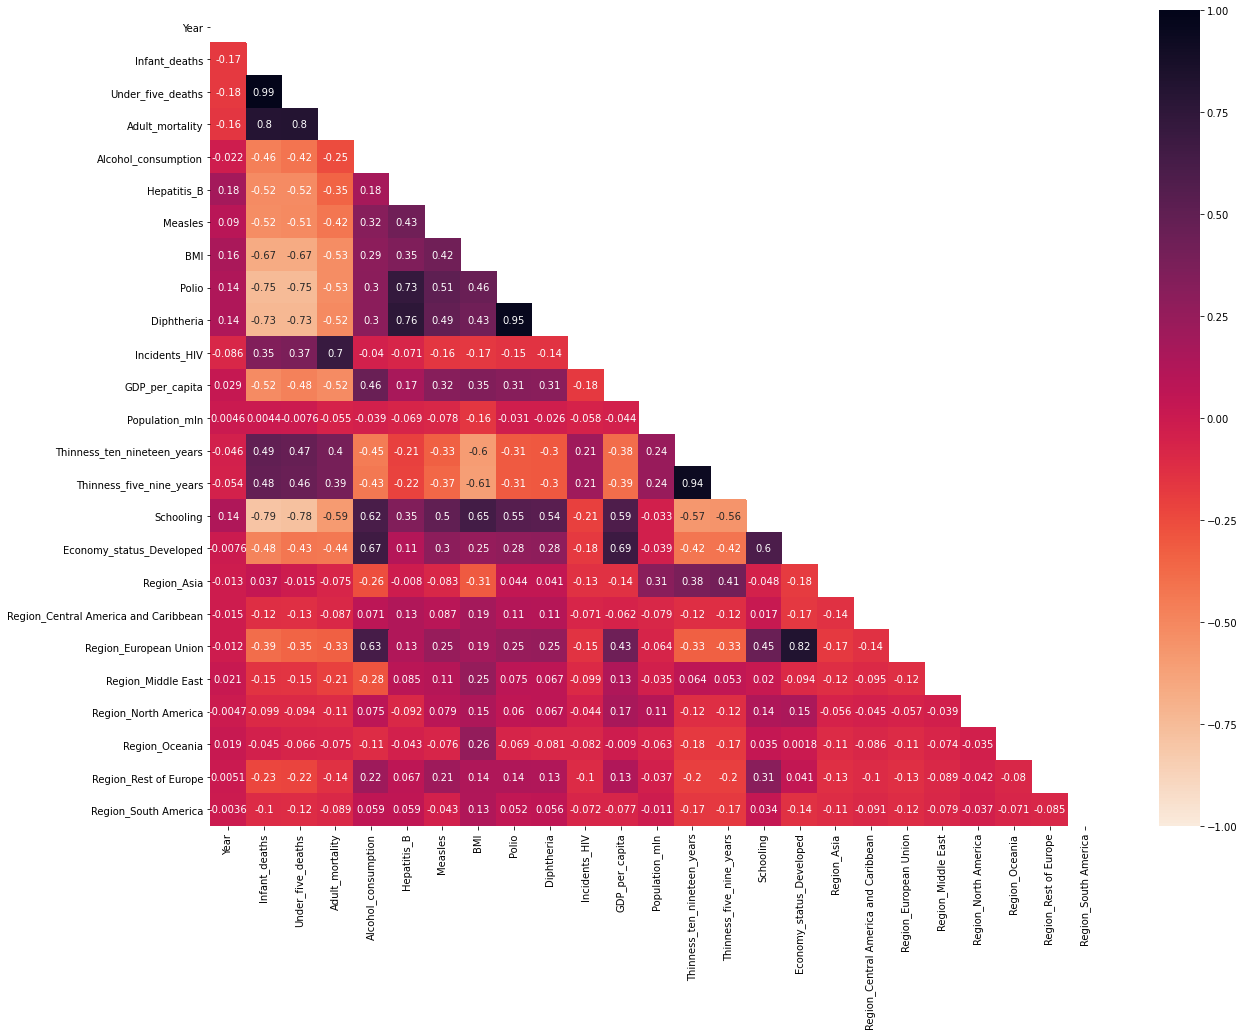

In [158]:
plt.figure(figsize=(20,15))
sns.heatmap(X_train.corr(),mask=np.triu(X_train.corr()),vmin=-1,vmax=1,annot=True,fmt='.2',cmap='rocket_r')
plt.show()

In [376]:
bp_model.to_csv('bp_model.csv',index=False)

In [377]:
minimal_model.to_csv('minimal_model.csv',index=False)